# Random forest classifier

In [1]:
from src.data.data_fetcher import get_raw_data
from src.features.feature_engineering import prepare_data
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from src.features.preprocess_data import fetch_preprocessed_data, get_preprocessed_test_data

In [2]:
train_a, train_b, train_c, X_train_estimated_a, X_train_estimated_b, X_train_estimated_c, X_train_observed_a, X_train_observed_b, X_train_observed_c, X_test_estimated_a, X_test_estimated_b, X_test_estimated_c = get_raw_data()

In [3]:
X_train_obs_combined, X_val_obs_combined, y_train_obs_combined, y_val_obs_combined, X_train_est_combined, X_val_est_combined, y_train_est_combined, y_val_est_combined = fetch_preprocessed_data()
X_test_estimated_a_processed, X_test_estimated_b_processed, X_test_estimated_c_processed = get_preprocessed_test_data()

c:\Users\Bruker\OneDrive\NTNU semester 05\TDT4173 Maskinlæring\ml_power_predictor\src\features\feature_engineering.py:131: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  estimated_resampled = estimated.resample('1H').mean()
c:\Users\Bruker\OneDrive\NTNU semester 05\TDT4173 Maskinlæring\ml_power_predictor\src\features\feature_engineering.py:131: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  estimated_resampled = estimated.resample('1H').mean()
c:\Users\Bruker\OneDrive\NTNU semester 05\TDT4173 Maskinlæring\ml_power_predictor\src\features\feature_engineering.py:131: FutureWarning: The default value of numeric_o

In [5]:
# Initialize a Random Forest regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Random Forest model on the cleaned training data
rf_model.fit(X_train_obs_combined, y_train_obs_combined)

# Predict on the cleaned validation set
y_val_pred_rf = rf_model.predict(X_val_obs_combined)

# Evaluate the Random Forest model using MAE on the cleaned validation set
mae_rf = mean_absolute_error(y_val_obs_combined, y_val_pred_rf)
print(f"Mean Absolute Error = {mae_rf}")


9.771050810580205

In [11]:
y_pred_test_est_a = rf_model.predict(X_test_estimated_a_processed)
y_pred_test_est_b = rf_model.predict(X_test_estimated_b_processed)
y_pred_test_est_c = rf_model.predict(X_test_estimated_c_processed)
# Step 4: Combine the predictions from the three locations into a single dataframe

y_pred_test_est_combined = y_pred_test_est_a + y_pred_test_est_b + y_pred_test_est_c
y_pred_test_est_combined.shape


(2880,)

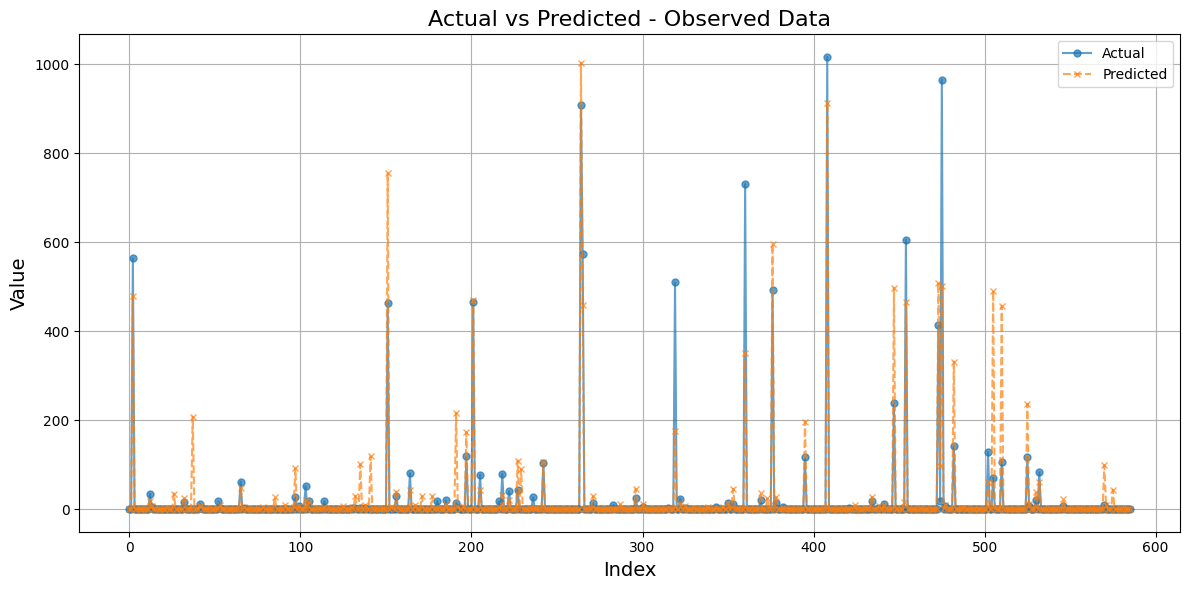

ValueError: Length of values (2880) does not match length of index (586)

<Figure size 1200x600 with 0 Axes>

In [12]:

from matplotlib import pyplot as plt
import pandas as pd
# Set up the plotting area
plt.figure(figsize=(12, 6))

# Line plot of Actual values
plt.plot(y_val_obs_combined.reset_index(drop=True), label='Actual', linestyle='-', marker='o', markersize=5, alpha=0.7)

# Line plot of Predicted values
plt.plot(pd.Series(y_val_pred_rf, index=y_val_obs_combined.index).reset_index(drop=True), label='Predicted', linestyle='--', marker='x', markersize=5, alpha=0.7)

# Titles and labels
plt.title('Actual vs Predicted - Observed Data', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plots
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(pd.Series(y_pred_test_est_combined, index=X_test_estimated_a_processed.index).reset_index(drop=True), label='Predicted', linestyle='-', marker='o', markersize=5, alpha=0.7)
plt.title('Predicted Values - Test Estimated Data', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Predicted Value', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()